In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='annotation_tools/'
#dataType='val2017'
annFile='{}casia.json'.format(dataDir) #.format coloca dentro de {} las variables escritas después

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [5]:
# get all images containing given categories, select one at random
category = "person"
catIds = coco.getCatIds(catNms=[category]);
imgIds = coco.getImgIds(catIds=catIds );
print("Hay {} imagenes de la categoría {}".format(len(imgIds), category))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#img =coco.loadImgs(imgIds[2])[0]

Hay 59 imagenes de la categoría person


In [6]:
img['file_name']

'001-bg-01-090-093.png'

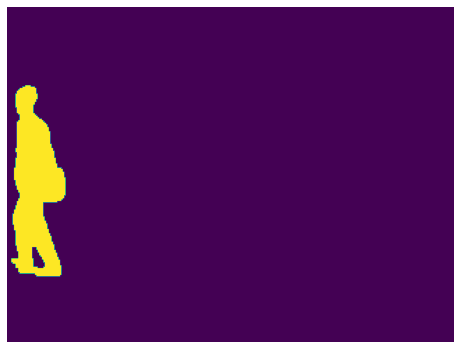

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread("datasets/casia/DatasetB-1/silhouettes/001/bg-01/090/"+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

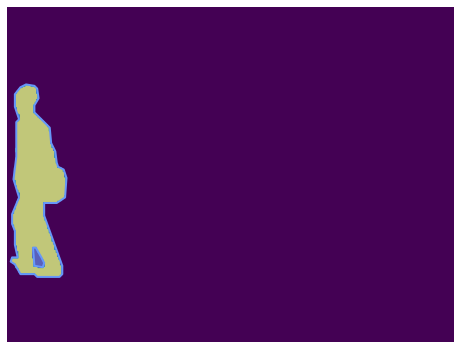

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)